Answer_1.
Building Naïve Bayes classifier for predicting whether a
cricket match will be played in the given weather conditions or not. Here the
weather conditions are described by features outlook, temperature, humidity and
wind. The target is play with two class labels Yes and No. (Dataset: play.csv)
a. Implement Naïve Bayes classifier which must
o Print the class prior probabilities form the training set
o Classify the test sample <Rain, Cool, High, Strong>. Need to print
likelihood for <Rain, Cool, High, Strong> and also class
conditional probabilities for “YES” and “NO” classes.
b. Use sklearn CategoricalNB to validate the results obtained above.


In [1]:
import pandas as pd
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split


data = pd.read_csv("/content/play.csv")

In [2]:
features = data[['outlook', 'temp', 'humidity', 'wind']]
target = data['play']

In [3]:
class_prior_probabilities = target.value_counts(normalize=True)
print("Class Prior Probabilities:")
print(class_prior_probabilities)

Class Prior Probabilities:
Yes    0.642857
No     0.357143
Name: play, dtype: float64


In [4]:
test_sample = ['Rain', 'Cool', 'High', 'Strong']

In [5]:
likelihood_yes = 1
likelihood_no = 1

for i in range(len(test_sample)):
    feature = features.columns[i]
    value = test_sample[i]

    likelihood_yes *= (features[target == 'Yes'][feature] == value).sum() / (target == 'Yes').sum()
    likelihood_no *= (features[target == 'No'][feature] == value).sum() / (target == 'No').sum()

print("\nLikelihood for", test_sample)
print("P(Rain|Yes) * P(Cool|Yes) * P(High|Yes) * P(Strong|Yes):", likelihood_yes)
print("P(Rain|No) * P(Cool|No) * P(High|No) * P(Strong|No):", likelihood_no)



Likelihood for ['Rain', 'Cool', 'High', 'Strong']
P(Rain|Yes) * P(Cool|Yes) * P(High|Yes) * P(Strong|Yes): 0.012345679012345678
P(Rain|No) * P(Cool|No) * P(High|No) * P(Strong|No): 0.03840000000000001


In [6]:
class_conditional_probabilities = {
    'Yes': likelihood_yes * class_prior_probabilities['Yes'],
    'No': likelihood_no * class_prior_probabilities['No']
}

if likelihood_yes > likelihood_no:
    print('\nYes')
else:
    print('\nNo')



No


In [7]:

print("\nClass Conditional Probabilities:")
print("P(Yes|Rain, Cool, High, Strong):", class_conditional_probabilities['Yes'])
print("P(No|Rain, Cool, High, Strong):", class_conditional_probabilities['No'])


Class Conditional Probabilities:
P(Yes|Rain, Cool, High, Strong): 0.007936507936507936
P(No|Rain, Cool, High, Strong): 0.013714285714285719


In [8]:
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.simplefilter('ignore')

ordinal_encoder = OrdinalEncoder()
df_encoded = pd.DataFrame(ordinal_encoder.fit_transform(data.drop('day', axis=1)), columns=data.columns[1:])

X = df_encoded.drop('play', axis=1)
y = data['play'].map({'No': 0, 'Yes': 1})

categorical_nb_model = CategoricalNB()
categorical_nb_model.fit(X, y)

def get_feature_names(encoder, columns):
    feature_names = []
    for col, categories in zip(columns, encoder.categories_):
        feature_names.extend([f"{col}_{cat}" for cat in categories])
    return feature_names


class_log_priors = categorical_nb_model.class_log_prior_
print("Class Prior Probabilities:")
print("P(Yes):", class_log_priors[1])
print("P(No):", class_log_priors[0])
print()


test_sample = [[2, 2, 0, 1]]
prediction = categorical_nb_model.predict(test_sample)
print("Prediction for <Rain, Cool, High, Strong>:", "Yes" if prediction[0] == 1 else "No")
print()


likelihood = categorical_nb_model.predict_proba(test_sample)
print("Likelihood for <Rain, Cool, High, Strong>:")
print("P(Yes | Rain, Cool, High, Strong):", likelihood[0][1])
print("P(No | Rain, Cool, High, Strong):", likelihood[0][0])
print()

Class Prior Probabilities:
P(Yes): -0.44183275227903884
P(No): -1.0296194171811581

Prediction for <Rain, Cool, High, Strong>: No

Likelihood for <Rain, Cool, High, Strong>:
P(Yes | Rain, Cool, High, Strong): 0.4304989017885156
P(No | Rain, Cool, High, Strong): 0.5695010982114843



Answer_2:
Assumming a classifier to predict the graduate admissions into
global universities for higher studies using parameters such as UG GPA, GRE
score, research expertise, etc. Using the graduate.csv dataset, build a naïve bayes
classifier to predict the graduate admissions chances. Report accuracy.

In [9]:
data1 = pd.read_csv('/content/Graduate.csv')

In [10]:
data1.head(5)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Admit  
0         1      1  
1         1      1  
2         1      1  
3         1      1  
4         0      1

In [11]:
data1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64

In [12]:
X = data1[['CGPA', 'GRE Score', 'Research']]
y = data1['Admit']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [15]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]


In [16]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.86


Answer_3:
Applying K-NN for the graduate admissions problem. Compare accuracy of KNN for different values of K.

In [17]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [18]:
df = pd.read_csv('/content/Graduate.csv')

In [19]:
X1 = df.drop('Admit', axis=1)
y1 = df['Admit']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [20]:
for k in range(1, 6):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train, y_train)
    y_pred = knn1.predict(X_test)
    accuracy1 = accuracy_score(y_test, y_pred)
    print(f'Accuracy for K={k}: {accuracy1}')


Accuracy for K=1: 0.92
Accuracy for K=2: 0.87
Accuracy for K=3: 0.92
Accuracy for K=4: 0.91
Accuracy for K=5: 0.93



Answer_4:
Plotting the bar chart for target variable in graduate.csv. You may observe the
class imbalance (ie. Class=1 more than Class=0). You may address this problem
either by data augmentation (to create dummy samples for Class=0) or SMOTE
algorithm for imbalance.
Those who show improved accuracy with the above said approached tested with
both naïve bayes and K-NN will get bonus marks. BONUS(QUESTION)

In [21]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

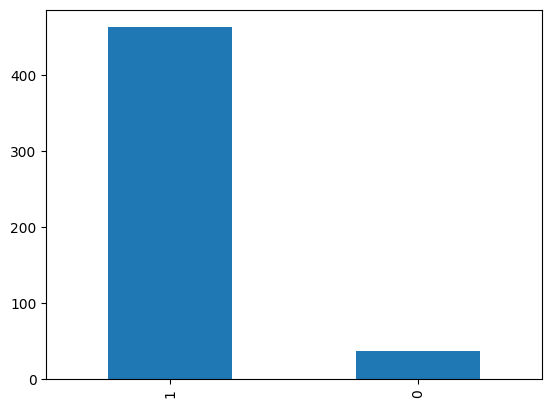

In [22]:
df['Admit'].value_counts().plot(kind='bar')
plt.show()


In [23]:
X = df.drop('Admit', axis=1)
y = df['Admit']
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [25]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy before :{accuracy}')
print(f'Accuracy for Naive Bayes: {accuracy_nb}')

k1=5
knn = KNeighborsClassifier(n_neighbors=k1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy berfore :{accuracy1}')
print(f'Accuracy for K={k1}: {accuracy_knn}')


Accuracy before :0.86
Accuracy for Naive Bayes: 0.8817204301075269
Accuracy berfore :0.93
Accuracy for K=5: 0.9247311827956989
